# Keras MLP example for MNIST dataset
[keras MNIST MLP example](https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py)

Check Avalable GPU

In [1]:
!nvidia-smi

Thu Sep  6 02:38:49 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    30W / 149W |      0MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Step1.
configure tensorflow option

In [0]:
'''
this is critical option. TF memory control allow_growth is mandatory option
'''
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config )

check available GPU memory

In [3]:
!nvidia-smi   | grep MiB

| N/A   39C    P0    71W / 149W |    115MiB / 11439MiB |      0%      Default |


## import keras


In [12]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras import backend as K

print('tensorflow ver. :',tf.__version__)
print('keras      ver. :', keras.__version__)

tensorflow ver. : 1.10.1
keras      ver. : 2.1.6


## download mnist dataset and prepare train/test dataset

In [5]:
%%time
# the data, split between train and test sets
#it will take time to download
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step
CPU times: user 410 ms, sys: 106 ms, total: 515 ms
Wall time: 1.89 s


## reshape the dataset for keras category label

In [9]:
%%time
num_classes = 10


# input image dimensions
img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#for confusion matrix we need original label format
y_test_cls=y_test

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)




x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
CPU times: user 93.1 ms, sys: 95.2 ms, total: 188 ms
Wall time: 187 ms


Check Dataset with Histogram

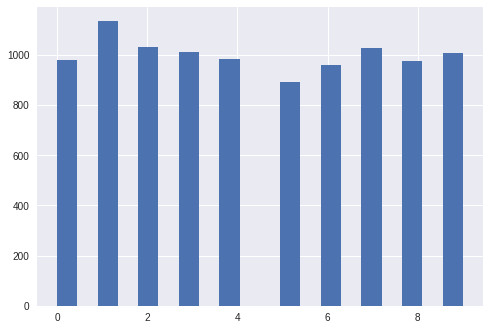

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(y_test_cls, bins=20 )
plt.show()

## define model MLP(Multi Layer Perceptron)

In [13]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

## Configure Loss function and solver

In [0]:
#configure loss 
#configure solver(optimizer) sgd, adam
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [15]:
epochs = 10
batch_size = 128

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3, 
                    shuffle=True)


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 10s 229us/step - loss: 0.2556 - acc: 0.9216 - val_loss: 0.0818 - val_acc: 0.9751
Epoch 2/10
42000/42000 [==============================] - 8s 188us/step - loss: 0.0831 - acc: 0.9750 - val_loss: 0.0562 - val_acc: 0.9833
Epoch 3/10
42000/42000 [==============================] - 8s 187us/step - loss: 0.0629 - acc: 0.9814 - val_loss: 0.0512 - val_acc: 0.9853
Epoch 4/10
42000/42000 [==============================] - 8s 187us/step - loss: 0.0510 - acc: 0.9840 - val_loss: 0.0447 - val_acc: 0.9872
Epoch 5/10
42000/42000 [==============================] - 8s 183us/step - loss: 0.0406 - acc: 0.9876 - val_loss: 0.0451 - val_acc: 0.9869
Epoch 6/10
42000/42000 [==============================] - 8s 181us/step - loss: 0.0342 - acc: 0.9898 - val_loss: 0.0500 - val_acc: 0.9868
Epoch 7/10
42000/42000 [==============================] - 8s 179us/step - loss: 0.0334 - acc: 0.9900 - val_loss: 0.0469 -

## check test dataset

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.035739749474732886
Test accuracy: 0.9899


In [17]:
y_test_cls

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [18]:
y_pred =model.predict_classes(x_test)
y_pred


array([7, 2, 1, ..., 4, 5, 6])

In [19]:
import pandas as pd
pd_label = pd.DataFrame()
pd_label["true"]=y_test_cls
pd_label["pred"]=y_pred
pd_label

,true,pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [20]:
  
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test_cls, y_pred=y_pred)    
cm

array([[ 977,    0,    1,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1130,    2,    1,    0,    0,    1,    1,    0,    0],
       [   1,    1, 1022,    0,    0,    0,    0,    8,    0,    0],
       [   0,    0,    1, 1004,    0,    2,    0,    2,    1,    0],
       [   0,    0,    0,    0,  974,    0,    3,    0,    1,    4],
       [   1,    0,    1,    6,    0,  880,    3,    1,    0,    0],
       [   3,    2,    0,    0,    1,    1,  950,    0,    1,    0],
       [   0,    2,    7,    0,    0,    0,    0, 1017,    1,    1],
       [   3,    1,    3,    1,    0,    1,    0,    5,  958,    2],
       [   2,    2,    1,    0,    3,    6,    0,    8,    0,  987]])

# rerun
Keras train use last snapshot w/o any model modification

In [21]:
epochs = 5
batch_size = 128

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3,
                    shuffle=True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 8s 189us/step - loss: 0.0290 - acc: 0.9910 - val_loss: 0.0562 - val_acc: 0.9879
Epoch 2/5
42000/42000 [==============================] - 8s 188us/step - loss: 0.0291 - acc: 0.9916 - val_loss: 0.0436 - val_acc: 0.9889
Epoch 3/5
42000/42000 [==============================] - 8s 190us/step - loss: 0.0290 - acc: 0.9916 - val_loss: 0.0508 - val_acc: 0.9892
Epoch 4/5
42000/42000 [==============================] - 8s 187us/step - loss: 0.0273 - acc: 0.9915 - val_loss: 0.0457 - val_acc: 0.9892
Epoch 5/5
42000/42000 [==============================] - 8s 189us/step - loss: 0.0293 - acc: 0.9913 - val_loss: 0.0537 - val_acc: 0.9882


In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.046431761144646
Test accuracy: 0.9892


In [23]:
y_pred2 =model.predict_classes(x_test)
cm = confusion_matrix(y_true=y_test_cls, y_pred=y_pred2)    
cm

array([[ 973,    1,    1,    1,    0,    0,    4,    0,    0,    0],
       [   0, 1129,    1,    2,    0,    1,    1,    1,    0,    0],
       [   0,    1, 1020,    0,    0,    0,    2,    8,    1,    0],
       [   0,    0,    1,  997,    0,   11,    0,    0,    1,    0],
       [   0,    0,    0,    0,  974,    0,    4,    0,    1,    3],
       [   0,    0,    1,    1,    0,  887,    2,    1,    0,    0],
       [   0,    2,    0,    0,    1,    3,  952,    0,    0,    0],
       [   0,    3,    7,    0,    0,    0,    0, 1017,    1,    0],
       [   2,    1,    1,    0,    0,    2,    2,    4,  960,    2],
       [   2,    0,    1,    0,    5,   11,    0,    7,    0,  983]])